# 多層パーセプトロン

## MNIST

### 必要なライブラリのインポート

In [32]:
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
import numpy as np

In [33]:
#
def load_mnist():
    mnist = fetch_mldata('MNIST original')
    mnist_X, mnist_y = shuffle(mnist.data.astype('float32'),
                               mnist.target.astype('int32'), random_state=42)

    mnist_X = mnist_X / 255.0

    return train_test_split(mnist_X, mnist_y,
                test_size=0.2,
                random_state=42)

def validate_homework():
    train_X, test_X, train_y, test_y = load_mnist()

    # validate for small dataset
    train_X_mini = train_X[:100]
    train_y_mini = train_y[:100]
    test_X_mini = test_X[:100]
    test_y_mini = test_y[:100]

    pred_y = homework(train_X_mini, train_y_mini, test_X_mini)
    print(f1_score(test_y_mini, pred_y, average='macro'))

def score_homework():
    train_X, test_X, train_y, test_y = load_mnist()
    pred_y = homework(train_X, train_y, test_X)
    print(f1_score(test_y, pred_y, average='macro'))

In [34]:
#MNISTを分類するクラス
#適切に編集してください

class MLP_MNIST(object):
        def __init__(self):
            pass
        
        def fit(self,x,t):
            

            self.numInput = x.shape[1]  #入力次元
            self.numHidden = 200  #隠れ層次元
            self.numOutput = 10 #出力層次元
            
            # 入力層-隠れ層間の重み初期値
            self.W1 = np.random.uniform(low=-0.08, high=0.08, size=(self.numInput, self.numHidden)).astype('float32')  
            self.b1 = np.zeros(self.numHidden).astype('float32')

            # 隠れ層-出力層間の重み初期値
            self.W2 = np.random.uniform(low=-0.08, high=0.08, size=(self.numHidden, self.numOutput)).astype('float32')
            self.b2 = np.zeros(self.numOutput).astype('float32')
            
            #one-hotベクトルに変換
            t= self.onehot(t)
            
            
            """#通常の学習
            #epoch数、学習を行う
            epoch_number=10000
            for epoch in range(epoch_number):
                if epoch%1000==1:
                        print(epoch)
                        print(self.cost)
                self.train(x, t)
            """
            
            #バッチ学習
            epoch_number=25
            batch_size = 10
            n_batches = x.shape[0] // batch_size
            random_state=42
            
            for epoch in range(epoch_number):
                x, t = shuffle(x, t, random_state=random_state)
                for i in range(n_batches):
                    start = i * batch_size
                    end = start + batch_size
                
                    self.train(x[start:end], t[start:end])
                if epoch%10==1:
                        print("EPOCH",epoch)
                        print("cost",self.cost)
            
            
            
        def train(self, x, t,eps=0.01):
            
            # Forward Propagation Layer1
            u1=np.matmul(x,self.W1)+self.b1
            z1=sigmoid(u1)
            # Forward Propagation Layer2
            u2=np.matmul(z1,self.W2)+self.b2
            y = softmax(u2)
        
            # 誤差（Cross Entropy）
            self.cost =  -np.mean(np.sum(t*np.log(y)))
            
            
            #Back Propagation
            
            #deltaの計算
            delta_2 = y - t # Layer2 delta
            delta_1 = deriv_sigmoid(u1) * np.matmul(delta_2, self.W2.T) # Layer1 delta
            
            #誤差を各重みで偏微分
            dW1 = np.matmul(x.T, delta_1)
            db1 = np.matmul(np.ones(len(x)), delta_1)        

            dW2 = np.matmul(z1.T, delta_2)
            db2 = np.matmul(np.ones(len(z1)), delta_2)
            
            # 重みの更新
            self.W1 = self.W1 - eps*dW1
            self.b1 = self.b1 - eps*db1
           
            self.W2 = self.W2 - eps*dW2
            self.b2 = self.b2 - eps*db2      
              
        def predict(self,x):
            
            # Feed Forward Propagtion
            u1=np.matmul(x,self.W1)+self.b1
            z1=sigmoid(u1)
            u2=np.matmul(z1,self.W2)+self.b2
            y = softmax(u2)
            
            return  y.argmax(axis=1)


        def onehot(self,y):
            """train_yをonehotに変換"""
            Z = np.zeros((len(y), self.numOutput))
            Z[np.arange(len(y)), y] = 1
            return Z
        
def sigmoid(x):
        return 1/(1 + np.exp(-x))
def deriv_sigmoid(x):
        return sigmoid(x)*(1 - sigmoid(x))
def softmax(x):
        exp_x = np.exp(x)
        return exp_x/np.sum(exp_x, axis=1, keepdims=True)
def deriv_softmax(x):
        return softmax(x)*(1 - softmax(x))

In [35]:
def homework(train_X, train_y, test_X):
    model = MLP_MNIST()
    model.fit(train_X,train_y)
    ans=model.predict(test_X)
    return ans 

In [36]:
validate_homework()
#score_homework()

OSError: could not read bytes

## $f(x)=x+0.3\sin(2\pi x)$ の問題

In [37]:
import pylab as plt
import numpy as np

In [38]:
def create_toy_dataset(func, n=100):
    x = np.random.uniform(size=(n, 1))
    t = func(x) + np.random.uniform(-0.1, 0.1, size=(n, 1))
    return x, t

def func(x):
        return x + 0.3 * np.sin(2 * np.pi * x)

In [39]:
#回帰を行うクラス
#適切に編集してください

class MLP_regression(object):
    def __init__(self):
        pass
        
    def fit(self,x,t):
        self.numInput = x.shape[1]  #入力次元
        self.numHidden = 3  #隠れ層次元
        self.numOutput = 1 #出力層次元
            
        # 入力層-隠れ層間の重み初期値
        self.W1 = np.random.uniform(low=-2, high=2, size=(self.numInput, self.numHidden)).astype('float32')  
        self.b1 = np.ones(self.numHidden) * 0.5
        
        # 隠れ層-出力層間の重み初期値
        self.W2 = np.random.uniform(low=-2, high=2, size=(self.numHidden, self.numOutput)).astype('float32')
        self.b2 = np.ones(self.numOutput) * 0.5
        
        #通常の学習
        #epoch数、学習を行う
        epoch_number=100000
        for epoch in range(epoch_number):
            if epoch%10000==1:
                    print("EPOCH",epoch)
                    print("cost",self.cost)
            self.train(x, t)
            
    def train(self, x, t,eps=0.001):
            
            # Forward Propagation Layer1
            u1=np.matmul(x,self.W1)+self.b1
            z1=tanh(u1)
            # Forward Propagation Layer2
            u2=np.matmul(z1,self.W2)+self.b2
            y = u2
        
            # 誤差（二乗誤差）
            self.cost =  0.5 * np.sum((y-t) ** 2)
           
            #Back Propagation
            #deltaの計算
            delta_2 = y - t # Layer2 delta
            delta_1 = deriv_tanh(u1) * np.matmul(delta_2, self.W2.T) # Layer1 delta
            
            #誤差を各重みで偏微分
            dW1 = np.matmul(x.T, delta_1)
            db1 = np.matmul(np.ones(len(x)), delta_1)        
            dW2 = np.matmul(z1.T, delta_2)
            db2 = np.matmul(np.ones(len(z1)), delta_2)
        
            # 重みの更新
            self.W1 = self.W1 - eps*dW1
            self.b1 = self.b1 - eps*db1
            self.W2 = self.W2 - eps*dW2
            self.b2 = self.b2 - eps*db2 
        
        
    def predict(self,x):
        # Forward Propagation Layer1
        u1=np.matmul(x,self.W1)+self.b1
        z1=tanh(u1)
        # Forward Propagation Layer2
        u2=np.matmul(z1,self.W2)+self.b2
        y = u2
        return y
    
def sigmoid(x):
        return 1/(1 + np.exp(-x))
def deriv_sigmoid(x):
        return sigmoid(x)*(1 - sigmoid(x))
def softmax(x):
        exp_x = np.exp(x)
        return exp_x/np.sum(exp_x, axis=1, keepdims=True)
def deriv_softmax(x):
        return softmax(x)*(1 - softmax(x))
def tanh(x):
        return np.tanh(x)
def deriv_tanh(x):
        return 1 - tanh(x) ** 2

In [40]:
#学習データ
x, t = create_toy_dataset(func)

#モデルのインスタンス
model=MLP_regression()

#モデルの学習
model.fit(x,t)

EPOCH 1
cost 17.763117984314224
EPOCH 10001
cost 0.8692967686933505
EPOCH 20001
cost 0.7953997695988295
EPOCH 30001
cost 0.5699183062889811
EPOCH 40001
cost 0.29250014622691817
EPOCH 50001
cost 0.20960602706011794
EPOCH 60001
cost 0.16862276695557174
EPOCH 70001
cost 0.15656460154624355
EPOCH 80001
cost 0.15420977261216012
EPOCH 90001
cost 0.15375421477207518


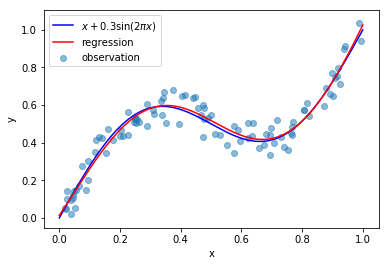

[[2.56323256 2.08195297 2.13706241]]
[-0.33687647 -2.04350121 -1.04228261]
[[ 1.81579906]
 [ 2.3782152 ]
 [-2.37223264]]
[1.05477811]


In [41]:
plt.scatter(x, t, alpha=0.5, label="observation")
x_test = np.linspace(0, 1, 1000)[:, np.newaxis]
y = model.predict(x_test)
plt.plot(x_test, func(x_test), color="blue", label="$x+0.3\sin(2\pi x)$")
plt.plot(x_test, y, color="red", label="regression")
plt.legend(loc="upper left")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
print(model.W1)
print(model.b1)
print(model.W2)
print(model.b2)

## 二値分類

In [7]:
def create_toy_dataset2():
    x = np.random.uniform(-1., 1., size=(1000, 2))
    labels = (np.prod(x, axis=1) > 0).astype(np.float)
    return x, labels.reshape(-1, 1)



(1000, 2)
(1000, 1)


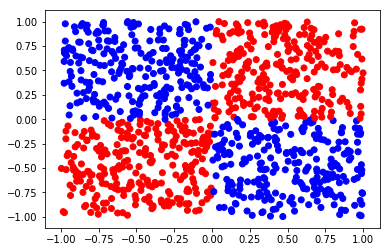

In [8]:
x, labels = create_toy_dataset2()
print(x.shape)
print(labels.shape)
colors = ["blue", "red"]
plt.scatter(x[:, 0], x[:, 1], c=[colors[int(label)] for label in labels])
plt.show()

In [9]:
class MLP_binary(object):
    def __init__(self):
        pass
    
    def fit(self,x,t):
        self.numInput = x.shape[1]  #入力次元
        self.numHidden = 4  #隠れ層次元
        self.numOutput = 1 #出力層次元
            
        # 入力層-隠れ層間の重み初期値
        self.W1 = np.random.uniform(low=-2, high=2, size=(self.numInput, self.numHidden)).astype('float32')  
        self.b1 = np.ones(self.numHidden) * 0.5
        
        # 隠れ層-出力層間の重み初期値
        self.W2 = np.random.uniform(low=-2, high=2, size=(self.numHidden, self.numOutput)).astype('float32')
        self.b2 = np.ones(self.numOutput) * 0.5
        
        #通常の学習
        #epoch数、学習を行う
        epoch_number=1000
        for epoch in range(epoch_number):
            if epoch%1000==1:
                    print("EPOCH",epoch)
                    print("cost",self.cost)
            self.train(x, t)
            
    def train(self, x, t,eps=0.001):

            # Forward Propagation Layer1
            u1=np.matmul(x,self.W1)+self.b1
            z1=tanh(u1)
            # Forward Propagation Layer2
            u2=np.matmul(z1,self.W2)+self.b2
            y = sigmoid(u2)
        
            
            # 誤差（二乗誤差）
            self.cost =  np.sum(-t * np.log(y) - (1 - t) * np.log(1 - y))
           
            #Back Propagation
            #deltaの計算
            delta_2 = y - t # Layer2 delta

            delta_1 = deriv_tanh(u1) * np.matmul(delta_2, self.W2.T) # Layer1 delta

            
            
            #誤差を各重みで偏微分
            dW1 = np.matmul(x.T, delta_1)
            db1 = np.matmul(np.ones(len(x)), delta_1)        
            dW2 = np.matmul(z1.T, delta_2)
            db2 = np.matmul(np.ones(len(z1)), delta_2)
        
            # 重みの更新
            self.W1 = self.W1 - eps*dW1
            self.b1 = self.b1 - eps*db1
            self.W2 = self.W2 - eps*dW2
            self.b2 = self.b2 - eps*db2 
        
        
    def predict(self,x):
        # Forward Propagation Layer1
        u1=np.matmul(x,self.W1)+self.b1
        z1=tanh(u1)
        # Forward Propagation Layer2
        u2=np.matmul(z1,self.W2)+self.b2
        y = sigmoid(u2)
        return y
    
def sigmoid(x):
        return 1/(1 + np.exp(-x))
def deriv_sigmoid(x):
        return sigmoid(x)*(1 - sigmoid(x))
def softmax(x):
        exp_x = np.exp(x)
        return exp_x/np.sum(exp_x, axis=1, keepdims=True)
def deriv_softmax(x):
        return softmax(x)*(1 - softmax(x))
def tanh(x):
        return np.tanh(x)
def deriv_tanh(x):
        return 1 - tanh(x) ** 2

In [10]:
model=MLP_binary()
model.fit(x,labels)



EPOCH 1
cost 773.2049385550602


In [11]:
X_test, Y_test = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
x_test = np.array([X_test, Y_test]).transpose(1, 2, 0).reshape(-1, 2)

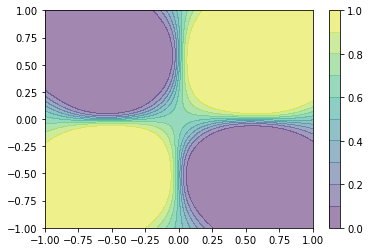

In [12]:
probs = model.predict(x_test)
Probs = probs.reshape(100, 100)
levels = np.linspace(0, 1, 11)
plt.contourf(X_test, Y_test, Probs, levels, alpha=0.5)
plt.colorbar()
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()